 # Import Data sets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import seaborn as sns

%matplotlib inline

import os

# mingw_path = 'E:\\mingw-w64\\x86_64-7.2.0-posix-seh-rt_v5-rev1\\mingw64\\bin'

# os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']

In [2]:
store_info = pd.read_csv('store.csv')
training = pd.read_csv('train.csv')
testing = pd.read_csv('test.csv')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Assessing Data

In [3]:
store_info.head(n=20)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


In [4]:
store_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
Store                        1115 non-null int64
StoreType                    1115 non-null object
Assortment                   1115 non-null object
CompetitionDistance          1112 non-null float64
CompetitionOpenSinceMonth    761 non-null float64
CompetitionOpenSinceYear     761 non-null float64
Promo2                       1115 non-null int64
Promo2SinceWeek              571 non-null float64
Promo2SinceYear              571 non-null float64
PromoInterval                571 non-null object
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [5]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
Store            1017209 non-null int64
DayOfWeek        1017209 non-null int64
Date             1017209 non-null object
Sales            1017209 non-null int64
Customers        1017209 non-null int64
Open             1017209 non-null int64
Promo            1017209 non-null int64
StateHoliday     1017209 non-null object
SchoolHoliday    1017209 non-null int64
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [6]:
training.head(n=20)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
5,6,5,2015-07-31,5651,589,1,1,0,1
6,7,5,2015-07-31,15344,1414,1,1,0,1
7,8,5,2015-07-31,8492,833,1,1,0,1
8,9,5,2015-07-31,8565,687,1,1,0,1
9,10,5,2015-07-31,7185,681,1,1,0,1


In [7]:
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
Id               41088 non-null int64
Store            41088 non-null int64
DayOfWeek        41088 non-null int64
Date             41088 non-null object
Open             41077 non-null float64
Promo            41088 non-null int64
StateHoliday     41088 non-null object
SchoolHoliday    41088 non-null int64
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


In [8]:
testing.head(n=20)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
5,6,10,4,2015-09-17,1.0,1,0,0
6,7,11,4,2015-09-17,1.0,1,0,0
7,8,12,4,2015-09-17,1.0,1,0,0
8,9,13,4,2015-09-17,1.0,1,0,0
9,10,14,4,2015-09-17,1.0,1,0,0


In [9]:
store_info.Promo2.value_counts() 
#the numbers of 1 are 571 which make sense why there are only 571 not-null of Promo2 further info

1    571
0    544
Name: Promo2, dtype: int64

In [10]:
store_info.PromoInterval.value_counts()  # use one_hot encode?

Jan,Apr,Jul,Oct     335
Feb,May,Aug,Nov     130
Mar,Jun,Sept,Dec    106
Name: PromoInterval, dtype: int64

In [11]:
store_info.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [12]:
store_info[store_info.CompetitionDistance.isnull()] # Print the information of stores which CompetitionDistance is None

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [13]:
training[training.Store==622]  # Check the sales information of store 622

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
621,622,5,2015-07-31,6306,540,1,1,0,1
1736,622,4,2015-07-30,5412,406,1,1,0,1
2851,622,3,2015-07-29,5326,468,1,1,0,1
3966,622,2,2015-07-28,4966,417,1,1,0,1
5081,622,1,2015-07-27,5413,517,1,1,0,1
6196,622,7,2015-07-26,0,0,0,0,0,0
7311,622,6,2015-07-25,2644,257,1,0,0,0
8426,622,5,2015-07-24,4183,440,1,0,0,1
9541,622,4,2015-07-23,3970,399,1,0,0,1
10656,622,3,2015-07-22,3721,376,1,0,0,1


In [14]:
training[training.DayOfWeek==7].describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,144730.000000,144730.0,144730.000000,144730.000000,144730.000000,144730.0,144730.000000
mean,558.427195,7.0,204.183189,35.786817,0.024826,0.0,0.018821
std,321.909484,0.0,1613.243517,284.606877,0.155594,0.0,0.135894
min,1.000000,7.0,0.000000,0.000000,0.000000,0.0,0.000000
25%,280.000000,7.0,0.000000,0.000000,0.000000,0.0,0.000000
50%,558.000000,7.0,0.000000,0.000000,0.000000,0.0,0.000000
75%,838.000000,7.0,0.000000,0.000000,0.000000,0.0,0.000000
max,1115.000000,7.0,37376.000000,5145.000000,1.000000,0.0,1.000000


In [15]:
training[training.DayOfWeek==7].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144730 entries, 5575 to 1011634
Data columns (total 9 columns):
Store            144730 non-null int64
DayOfWeek        144730 non-null int64
Date             144730 non-null object
Sales            144730 non-null int64
Customers        144730 non-null int64
Open             144730 non-null int64
Promo            144730 non-null int64
StateHoliday     144730 non-null object
SchoolHoliday    144730 non-null int64
dtypes: int64(7), object(2)
memory usage: 11.0+ MB


In [16]:
training[(training.DayOfWeek==7) & (training.Sales != 0)].Store.unique()  # Some stores still open even at Sunday!

array([  85,  122,  209,  259,  262,  274,  299,  310,  335,  353,  423,
        433,  453,  494,  512,  524,  530,  562,  578,  676,  682,  732,
        733,  769,  863,  867,  931,  948, 1045, 1081, 1097, 1099,  877])

## Conclusion

The data quality is actually pretty good, there are some missing value though, but it is reasonable. And I think won't be too hard to handle.

So, I thnik the hardest problem is coming back to feature engineering, how to deal time sereis data seems to be a prior problem.

# Data wrangling(or EDA?)

In [17]:
#Make copies before cleaning
training_copy = pd.DataFrame.copy(training)
testing_copy = pd.DataFrame.copy(testing)
store_info_copy = pd.DataFrame.copy(store_info)

In [18]:
training_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
Store            1017209 non-null int64
DayOfWeek        1017209 non-null int64
Date             1017209 non-null object
Sales            1017209 non-null int64
Customers        1017209 non-null int64
Open             1017209 non-null int64
Promo            1017209 non-null int64
StateHoliday     1017209 non-null object
SchoolHoliday    1017209 non-null int64
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [19]:
store_info_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
Store                        1115 non-null int64
StoreType                    1115 non-null object
Assortment                   1115 non-null object
CompetitionDistance          1112 non-null float64
CompetitionOpenSinceMonth    761 non-null float64
CompetitionOpenSinceYear     761 non-null float64
Promo2                       1115 non-null int64
Promo2SinceWeek              571 non-null float64
Promo2SinceYear              571 non-null float64
PromoInterval                571 non-null object
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


Problem

- Stores information are separated with sales performance

Define

- join the store_info to training base on store id

In [20]:
training_with_info = training_copy.merge(store_info_copy,how='left',left_on='Store',right_on='Store',suffixes=('store_train','store_info'),copy=True)

In [21]:
#Check 
training_with_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
Store                        1017209 non-null int64
DayOfWeek                    1017209 non-null int64
Date                         1017209 non-null object
Sales                        1017209 non-null int64
Customers                    1017209 non-null int64
Open                         1017209 non-null int64
Promo                        1017209 non-null int64
StateHoliday                 1017209 non-null object
SchoolHoliday                1017209 non-null int64
StoreType                    1017209 non-null object
Assortment                   1017209 non-null object
CompetitionDistance          1014567 non-null float64
CompetitionOpenSinceMonth    693861 non-null float64
CompetitionOpenSinceYear     693861 non-null float64
Promo2                       1017209 non-null int64
Promo2SinceWeek              509178 non-null float64
Promo2SinceYear              509178 non-null f

In [22]:
training_with_info.head(n=20)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,5,2015-07-31,5651,589,1,1,0,1,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,5,2015-07-31,15344,1414,1,1,0,1,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,5,2015-07-31,8492,833,1,1,0,1,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,5,2015-07-31,8565,687,1,1,0,1,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,5,2015-07-31,7185,681,1,1,0,1,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


In [23]:
training_with_info.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000


### EDA( Categorical features with Sales)

Okay, now let me begin exploration data analysis process(maybe will involve data wrangling).


1, What is the relation between Storetype and sale?

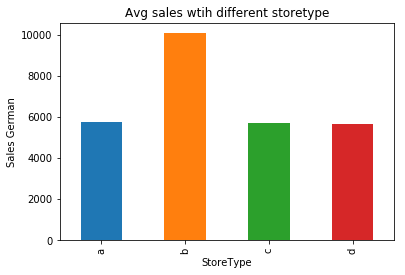

In [24]:
Sales_with_storetype = training_with_info.groupby(by=['StoreType'])
Sales_with_storetype.Sales.mean().plot.bar()
plt.title('Avg sales wtih different storetype')
plt.ylabel('Sales German');

In [25]:
Sales_with_storetype.Sales.mean()

StoreType
a     5738.179710
b    10058.837334
c     5723.629246
d     5641.819243
Name: Sales, dtype: float64

Conclusion: B storetype has highest avgrage sale than others significantly

In [26]:
Sales_with_storetype.Sales.sum()

StoreType
a    3165334859
b     159231395
c     783221426
d    1765392943
Name: Sales, dtype: int64

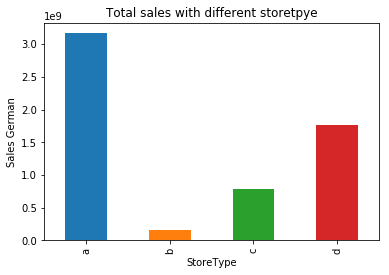

In [27]:
Sales_with_storetype.Sales.sum().plot.bar()
plt.ylabel('Sales German')
plt.title('Total sales with different storetpye');

Conclusion: Different with average sales, the total sales performance, A stroetype significantly beat other types. What's more, on the contrary with highest average sales, B storetype has incrediblely low total sales performances. Which leads to a hypothesis that B may represent expensive shop or something like exclusive factory sales agent. Let's see the store number to get further detail.

In [28]:
Sales_with_storetype.Store.count()

StoreType
a    551627
b     15830
c    136840
d    312912
Name: Store, dtype: int64

Aha, the store number is highly explained by total sales, larger store number, higher totall sales but not necessary with average performance, pretty straightforward.

Finally on storetype and sale, let me calulate the corralation coefficient between storetype and sale

In [29]:
temp = training_with_info.copy()

In [30]:
temp['StoreType'] = temp['StoreType'].map({'b':1,'a':2,'c':3,'d':4})

In [31]:
np.corrcoef(temp.Sales,temp.StoreType)

array([[ 1.        , -0.04378844],
       [-0.04378844,  1.        ]])

Conclusion: Although B storetype has higher avgrage sales, the overall corralation between storetypes and sales is weak....probably it is not a good idea to replace string to numeric values...I will use one-hot-encoding at the feature processing step to see if one-hot encode is better than this replace with arbitrary numeric values.

Next....let me see the relation between assortment and sales

In [32]:
Assortment_with_Sale = training_with_info.groupby(by=['Assortment'])

In [33]:
Assortment_with_Sale.Store.count() # Check out the number of each assortment

Assortment
a    537445
b      8294
c    471470
Name: Store, dtype: int64

In [34]:
Assortment_with_Sale.Sales.sum() # Check out the total sales with different assortment

Assortment
a    2945750070
b      70946312
c    2856484241
Name: Sales, dtype: int64

In [35]:
Assortment_with_Sale.Sales.mean() # Check out the Avg sales with different assortment

Assortment
a    5481.026096
b    8553.931999
c    6058.676567
Name: Sales, dtype: float64

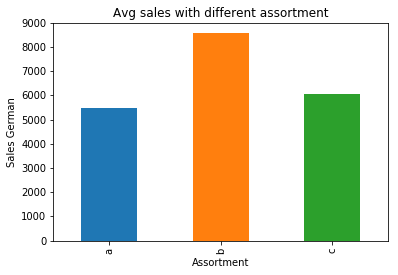

In [36]:
Assortment_with_Sale.Sales.mean().plot.bar()
plt.ylabel('Sales German')
plt.title('Avg sales with different assortment');

Conclusion: We can see that B assortment has highest average sales while also has lowest number of stores to sell B assortment....Maybe it is sold by B storetype stores mainly.

In [37]:
# To verify my guess, I calculate the proportion of B assortment that sold by B storetype
number_of_b_B = len(training_with_info[(training_with_info.Assortment=='b')&(training_with_info.StoreType=='b')])
number_of_b = len(training_with_info[training_with_info.Assortment=='b'])
number_of_b_B/number_of_b

1.0

So....that is it, all of B assortments are sold by B storetype stores....B assortment maybe is something important but ony sold by sepecfic storetype...maybe it is Medical stuff.

Then because there are only 8294 number of B asstortments while B storetype on the other hand has 15830...Which means only half of B storetype stores sale B assortment. Which brings up a question, is assortment the lurking variable that real affect the sales performance of stores?


In [38]:
# I am gonna compare the sale performacne on B store sales B assortment and B store but sales other assortments
sale_bb = training_with_info[(training_with_info.Assortment=='b')&(training_with_info.StoreType=='b')].Sales
sale_b_other = training_with_info[(training_with_info.Assortment!='b')&(training_with_info.StoreType=='b')].Sales
print ('Avg sales performance on B storetype stores which sale B assortment',sale_bb.mean())
print ('Avg sales performance on B storetype stores which sale other assortment',sale_b_other.mean())

Avg sales performance on B storetype stores which sale B assortment 8553.931999035447
Avg sales performance on B storetype stores which sale other assortment 11715.111863057326


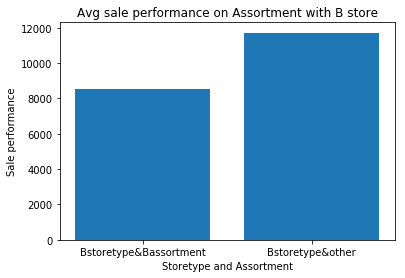

In [39]:
plt.bar([1,2],[sale_bb.mean(),sale_b_other.mean()])
plt.xticks([1,2],['Bstoretype&Bassortment','Bstoretype&other'])
plt.ylabel('Sale performance')
plt.xlabel("Storetype and Assortment")
plt.title("Avg sale performance on Assortment with B store");

Hmmmm.....That is interesting, looks like avg sale for those who don't sale B assortment is higher than who sale B assortment....Well, I could not figure out, I just stuck...How about this, let us just move forward for now.

Next, I will explore the stateholiday impact on sale performance.

In [40]:
State_with_sales = training_with_info.groupby(by='StateHoliday')
State_with_sales.Store.count()

StateHoliday
0    131072
0    855087
a     20260
b      6690
c      4100
Name: Store, dtype: int64

VoV, why there are two 0 exist? what is happening.....

In [41]:
training_with_info.StateHoliday[0]

'0'

In [42]:
State_with_sales.Sales.mean()

StateHoliday
0    5733.530624
0    5980.279717
a     290.735686
b     214.311510
c     168.733171
Name: Sales, dtype: float64

Hmmm, those two 0 have roughly same avgrage sales, on the other hand a,b and c have very low avgrage sales...so I guess those two 0 are actually same...

Well...you know what...let me run a hypothesis testing to make sure those two 0 are indeed the same thing


So let me define U0 represent the first 0's mean sale, U1 represent the second 0's mean sale.

H0: U0 = U1

H1: U0 != U1

In [43]:
training_with_info.StateHoliday.unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [44]:
len(training_with_info[training_with_info.StateHoliday==0])

131072

Re-define...

So let me define U0 represent 0's mean sale, U1 represent '0's mean sale.

H0: U0 = U1(5980.279)

H1: U0 != U1(5980.279)

I will run a z-test considering I have more than a million number of sample... more specificly a single sample z-test, so the fianl version will be 

H0: U0 = 5980.279

H1: U0 != 5980.279

Alpha level is 5%.

In [45]:
data_0 = training_with_info[training_with_info.StateHoliday==0].Sales
means_0 = []
np.random.seed(42)
#simulate 10000 times of 50 draw each times, I carefully control the sample size in case it is too big so that 
#very slightly difference will become statistically significant
for _ in range(10000):
    sample = data_0.sample(50)
    means_0.append(np.mean(sample))

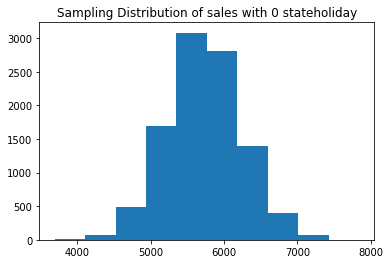

In [46]:
plt.hist(means_0)
# plt.axvline(lower,color='r')
# plt.axvline(upper,color='r')
# plt.axvline(mean_,color='r')
plt.title('Sampling Distribution of sales with 0 stateholiday');

In [47]:
std = np.std(means_0)
z_score = (np.mean(means_0) - 5980.279)/std
print(z_score)

-0.489442480255


In [48]:
data_0_str = training_with_info[training_with_info.StateHoliday=='0'].Sales
means_0_str = []
np.random.seed(42)
#simulate 10000 times of 50 draw each times, I carefully control the sample size in case it is too big so that 
#very slightly difference will become statistically significant
for _ in range(10000):
    sample = data_0_str.sample(50)
    means_0_str.append(np.mean(sample))

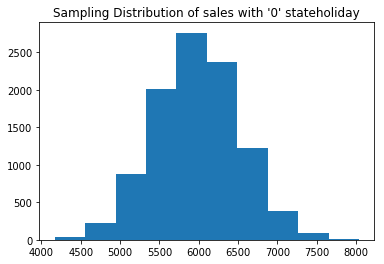

In [49]:
plt.hist(means_0_str)
plt.title("Sampling Distribution of sales with '0' stateholiday");

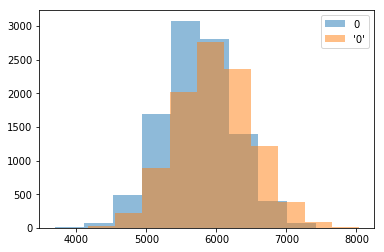

In [50]:
plt.hist(means_0,alpha=0.5,label='0')
plt.hist(means_0_str,alpha=0.5,label="'0'")
plt.legend();

Hmmm, after running a not so rigorous z-test, I can say that the mean sales of 0 is same with '0'(Neighter statistical sginificant nor prctical significant)( Here, maybe [Two-sample z-test](https://onlinecourses.science.psu.edu/stat414/node/268) is a better choice)


So, I will combine 0 and '0' into '0', making Sateholiday become a str categorical variable then use one-hot encoding( after all, that is all I know)

In [51]:
training_with_info.StateHoliday.replace(to_replace='0',value=0,inplace=True)
training_with_info.StateHoliday.value_counts()

0    986159
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [52]:
training_with_info

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,5,2015-07-31,5651,589,1,1,0,1,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,5,2015-07-31,15344,1414,1,1,0,1,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,5,2015-07-31,8492,833,1,1,0,1,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,5,2015-07-31,8565,687,1,1,0,1,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,5,2015-07-31,7185,681,1,1,0,1,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


In [53]:
training_with_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
Store                        1017209 non-null int64
DayOfWeek                    1017209 non-null int64
Date                         1017209 non-null object
Sales                        1017209 non-null int64
Customers                    1017209 non-null int64
Open                         1017209 non-null int64
Promo                        1017209 non-null int64
StateHoliday                 1017209 non-null object
SchoolHoliday                1017209 non-null int64
StoreType                    1017209 non-null object
Assortment                   1017209 non-null object
CompetitionDistance          1014567 non-null float64
CompetitionOpenSinceMonth    693861 non-null float64
CompetitionOpenSinceYear     693861 non-null float64
Promo2                       1017209 non-null int64
Promo2SinceWeek              509178 non-null float64
Promo2SinceYear              509178 non-null f

In [54]:
Stateholidy_a_date= training_with_info[training_with_info.StateHoliday=='a'].Date.str.split('-').str[1:]
a_date = set()
for _ in Stateholidy_a_date:
    month = _[0]
    day = _[1]
    month_day = month+day
    a_date.add(month_day)

In [55]:
a_date #Regional holiday?

{'0101',
 '0106',
 '0501',
 '0509',
 '0514',
 '0520',
 '0525',
 '0529',
 '0530',
 '0604',
 '0609',
 '0619',
 '0815',
 '1003',
 '1031',
 '1101',
 '1119',
 '1120'}

In [56]:
training_with_info[training_with_info.StateHoliday=='a'].DayOfWeek.value_counts()

4    9299
1    3654
5    2796
3    2380
2    1423
6     399
7     309
Name: DayOfWeek, dtype: int64

In [57]:
Stateholidy_b_date= training_with_info[training_with_info.StateHoliday=='b'].Date.str.split('-').str[1:]
b_date = set()
for _ in Stateholidy_b_date:
    month = _[0]
    day = _[1]
    month_day = month+day
    b_date.add(month_day)

In [58]:
b_date #Easter??

{'0329', '0401', '0403', '0406', '0418', '0421'}

In [59]:
training_with_info[training_with_info.StateHoliday=='b'].DayOfWeek.value_counts()
#Either on Friday or Monday

5    3345
1    3345
Name: DayOfWeek, dtype: int64

[Easter Monday](https://en.wikipedia.org/wiki/Easter_Monday)

[Easter Friday(Good Friday)](https://en.wikipedia.org/wiki/Good_Friday)

In [60]:
Stateholidy_c_date= training_with_info[training_with_info.StateHoliday=='c'].Date.str.split('-').str[1:]
c_date = set()
for _ in Stateholidy_c_date:
    month = _[0]
    day = _[1]
    month_day = month+day
    c_date.add(month_day)

In [61]:
c_date #Christmas?

{'1225', '1226'}

Conclusion: there 4 types of stateholiday , o represents non-holiday, a,b,c represent 3 kinds of holiday. And base on the times of each holiday and its avgrage sales, the top-down importance of holiday is c,b,a.

Reference from wiki https://en.wikipedia.org/wiki/Public_holidays_in_Germany

Reference from expatica https://www.expatica.com/de/about/Public-holidays-in-Germany_105411.html

Next, I will explore the impact of Promo2 on sales performance. 

In [62]:
Promo2_sales = training_with_info.groupby(by='Promo2')
Promo2_sales.Sales.mean()

Promo2
0    6124.710161
1    5423.718218
Name: Sales, dtype: float64

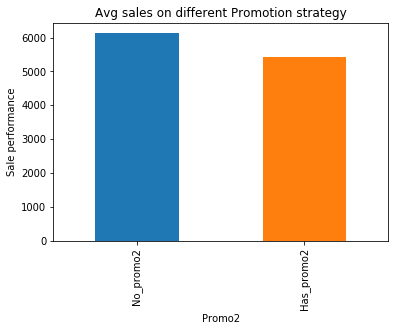

In [63]:
Promo2_sales.Sales.mean().plot.bar()
plt.xticks([0,1],['No_promo2','Has_promo2'])
plt.ylabel("Sale performance")
plt.title('Avg sales on different Promotion strategy');

Wow, the actual situation is quite different with what I expect....I. thought stores who do the promotion2 will have a higher sale performance and it turns out stores who don't do the second promotion have higher sale performance, then how the promotion 1?

In [64]:
Promo_sales = training_with_info.groupby(by='Promo')
Promo_sales.Sales.mean()

Promo
0    4406.050805
1    7991.152046
Name: Sales, dtype: float64

In [65]:
Promo_sales.Store.count()

Promo
0    629129
1    388080
Name: Store, dtype: int64

In [66]:
training_with_info[(training_with_info.Promo==1)&(training_with_info.Promo2==0)].Sales.mean()
# Calculate the avg sale for those who run promotion1 but not promotion2

8393.780051941627

Conculsion: Promotion1 definite has a positive effect on sale performance while Promotion2 effect is much more weak than promotion1 probably due to marginal effect and those who has good sale performance don't need to run promotion2 to attract customers.

In [67]:
training_promo2 = training_with_info[training_with_info.Promo2 !=0]
training_promo2

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
10,11,5,2015-07-31,10457,1236,1,1,0,1,a,c,960.0,11.0,2011.0,1,1.0,2012.0,"Jan,Apr,Jul,Oct"
11,12,5,2015-07-31,8959,962,1,1,0,1,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,5,2015-07-31,8821,568,1,1,0,0,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
13,14,5,2015-07-31,6544,710,1,1,0,1,a,a,1300.0,3.0,2014.0,1,40.0,2011.0,"Jan,Apr,Jul,Oct"
14,15,5,2015-07-31,9191,766,1,1,0,1,d,c,4110.0,3.0,2010.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
16,17,5,2015-07-31,8430,946,1,1,0,1,a,a,50.0,12.0,2005.0,1,26.0,2010.0,"Jan,Apr,Jul,Oct"
17,18,5,2015-07-31,10071,936,1,1,0,1,d,c,13840.0,6.0,2010.0,1,14.0,2012.0,"Jan,Apr,Jul,Oct"
18,19,5,2015-07-31,8234,718,1,1,0,1,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"


In [68]:
training_promo2.groupby(by='PromoInterval').Sales.mean()

PromoInterval
Feb,May,Aug,Nov     5311.048585
Jan,Apr,Jul,Oct     5562.364063
Mar,Jun,Sept,Dec    5143.829243
Name: Sales, dtype: float64

In [69]:
training_promo2.groupby(by='PromoInterval').Store.count()

PromoInterval
Feb,May,Aug,Nov     118596
Jan,Apr,Jul,Oct     293122
Mar,Jun,Sept,Dec     97460
Name: Store, dtype: int64

In [70]:
training_with_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
Store                        1017209 non-null int64
DayOfWeek                    1017209 non-null int64
Date                         1017209 non-null object
Sales                        1017209 non-null int64
Customers                    1017209 non-null int64
Open                         1017209 non-null int64
Promo                        1017209 non-null int64
StateHoliday                 1017209 non-null object
SchoolHoliday                1017209 non-null int64
StoreType                    1017209 non-null object
Assortment                   1017209 non-null object
CompetitionDistance          1014567 non-null float64
CompetitionOpenSinceMonth    693861 non-null float64
CompetitionOpenSinceYear     693861 non-null float64
Promo2                       1017209 non-null int64
Promo2SinceWeek              509178 non-null float64
Promo2SinceYear              509178 non-null f

In [71]:
training_with_info.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000


In [72]:
training_with_info.SchoolHoliday.value_counts()

0    835488
1    181721
Name: SchoolHoliday, dtype: int64

In [73]:
training_with_info[training_with_info.SchoolHoliday==0].Sales.mean()

5620.97903381018

In [74]:
training_with_info[training_with_info.SchoolHoliday==1].Sales.mean()

6476.522207119706

Hmmmm, so...so far I've been exploring **Assortment**, **StoreType**, **Promo2**, **StateHoliday** relation with **Sales**. 

Next, I decide to search the **datetime object** and **Sales** relation.

In [75]:
training_with_info

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,5,2015-07-31,5651,589,1,1,0,1,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,5,2015-07-31,15344,1414,1,1,0,1,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,5,2015-07-31,8492,833,1,1,0,1,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,5,2015-07-31,8565,687,1,1,0,1,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,5,2015-07-31,7185,681,1,1,0,1,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


In [76]:
training_with_info['Year']= training_with_info.Date.str.split('-').str[0]
training_with_info['Month']= training_with_info.Date.str.split('-').str[1]
training_with_info['Day']= training_with_info.Date.str.split('-').str[2]
# I have saved these codes at my note due to I will use it in my testing set

In [77]:
training_with_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 21 columns):
Store                        1017209 non-null int64
DayOfWeek                    1017209 non-null int64
Date                         1017209 non-null object
Sales                        1017209 non-null int64
Customers                    1017209 non-null int64
Open                         1017209 non-null int64
Promo                        1017209 non-null int64
StateHoliday                 1017209 non-null object
SchoolHoliday                1017209 non-null int64
StoreType                    1017209 non-null object
Assortment                   1017209 non-null object
CompetitionDistance          1014567 non-null float64
CompetitionOpenSinceMonth    693861 non-null float64
CompetitionOpenSinceYear     693861 non-null float64
Promo2                       1017209 non-null int64
Promo2SinceWeek              509178 non-null float64
Promo2SinceYear              509178 non-null f

In [78]:
training_with_info.Month = training_with_info.Month.astype('int')
training_with_info.Year = training_with_info.Year.astype('int')
training_with_info.Day = training_with_info.Day.astype('int')

In [79]:
training_with_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 21 columns):
Store                        1017209 non-null int64
DayOfWeek                    1017209 non-null int64
Date                         1017209 non-null object
Sales                        1017209 non-null int64
Customers                    1017209 non-null int64
Open                         1017209 non-null int64
Promo                        1017209 non-null int64
StateHoliday                 1017209 non-null object
SchoolHoliday                1017209 non-null int64
StoreType                    1017209 non-null object
Assortment                   1017209 non-null object
CompetitionDistance          1014567 non-null float64
CompetitionOpenSinceMonth    693861 non-null float64
CompetitionOpenSinceYear     693861 non-null float64
Promo2                       1017209 non-null int64
Promo2SinceWeek              509178 non-null float64
Promo2SinceYear              509178 non-null f

In [80]:
training_with_info.groupby(by='Year').Sales.mean()

Year
2013    5658.533675
2014    5833.290704
2015    5878.245380
Name: Sales, dtype: float64

In [81]:
training_with_info.groupby(by='Month').Sales.mean()

Month
1     5465.395529
2     5645.253150
3     5784.578871
4     5738.866916
5     5489.639973
6     5760.964375
7     6064.915711
8     5693.016554
9     5570.246033
10    5537.037419
11    6008.111821
12    6826.611377
Name: Sales, dtype: float64

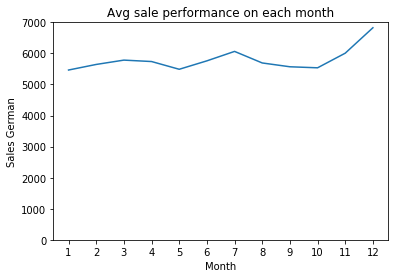

In [82]:
month = [i for i in range(1,13)]
training_with_info.groupby(by='Month').Sales.mean().plot()
plt.ylabel('Sales German')
plt.title("Avg sale performance on each month")
plt.xticks(month)
plt.ylim(0,7000);

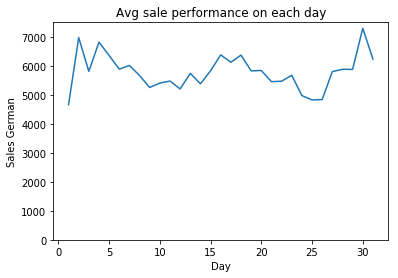

In [83]:
training_with_info.groupby(by='Day').Sales.mean().plot()
plt.ylabel('Sales German')
plt.title("Avg sale performance on each day")
plt.ylim(0,7500);

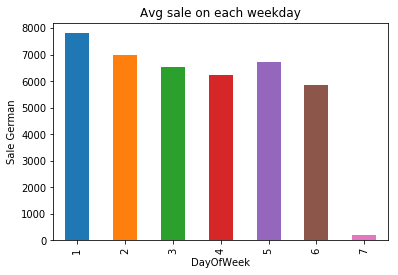

In [84]:
training_with_info.groupby(by='DayOfWeek').Sales.mean().plot.bar()
plt.ylabel('Sale German')
plt.title("Avg sale on each weekday");

## EDA( single continuous variable)

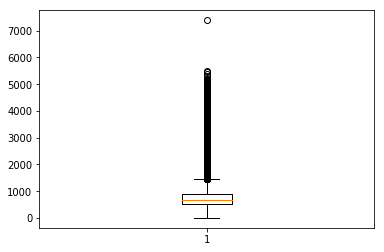

In [85]:
number_of_customer = training_with_info[training_with_info.Customers != 0].Customers # Exculde dayoff
plt.boxplot(number_of_customer);

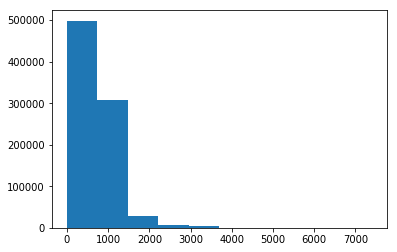

In [86]:
plt.hist(number_of_customer);

In [87]:
number_of_customer.describe()

count    844340.000000
mean        762.775369
std         401.195377
min           3.000000
25%         519.000000
50%         676.000000
75%         893.000000
max        7388.000000
Name: Customers, dtype: float64

The main question here was should I remove the outliers?

Through googling, I decide to keep the outliers for they might refer to some specially events.

[Outliers: To Drop or Not to Drop](https://www.theanalysisfactor.com/outliers-to-drop-or-not-to-drop/)

[Is it OK to remove outliers from data?](https://stats.stackexchange.com/questions/200534/is-it-ok-to-remove-outliers-from-data/200923)

In [88]:
# Identify those outliers and see if I can find some interesting information
Inter_quartile = 893- 519
upper_bound = 893 + 1.5*Inter_quartile
lower_bound = 519- 1.5*Inter_quartile
outliers_of_customers = training_with_info[(training_with_info.Customers<lower_bound)|(training_with_info.Customers>upper_bound)]
temp = outliers_of_customers.drop_duplicates(subset='Date')
temp.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Year,Month,Day
count,942.000000,942.000000,942.000000,942.000000,942.0,942.000000,942.000000,942.000000,762.000000,762.000000,942.000000,15.000000,15.000000,942.000000,942.000000,942.000000
mean,85.149682,3.997877,12753.967091,1756.236730,1.0,0.382166,0.179406,1021.730361,7.182415,2006.463255,0.015924,8.000000,2012.133333,2013.837580,5.961783,15.707006
std,90.561080,1.998404,2347.105286,305.305889,0.0,0.486175,0.383895,2766.371705,3.038008,3.524547,0.125246,13.580448,1.060099,0.766009,3.350357,8.794449
min,3.000000,1.000000,6825.000000,1455.000000,1.0,0.000000,0.000000,150.000000,4.000000,2003.000000,0.000000,1.000000,2011.000000,2013.000000,1.000000,1.000000
25%,25.000000,2.000000,11041.750000,1531.000000,1.0,0.000000,0.000000,430.000000,4.000000,2003.000000,0.000000,1.000000,2012.000000,2013.000000,3.000000,8.000000
50%,25.000000,4.000000,12115.000000,1643.000000,1.0,0.000000,0.000000,430.000000,9.000000,2005.000000,0.000000,1.000000,2012.000000,2014.000000,6.000000,16.000000
75%,125.000000,6.000000,14093.750000,1865.750000,1.0,1.000000,0.000000,760.000000,10.000000,2009.000000,0.000000,8.000000,2012.000000,2014.000000,9.000000,23.000000
max,262.000000,7.000000,24882.000000,3155.000000,1.0,1.000000,1.000000,58260.000000,12.000000,2014.000000,1.000000,40.000000,2015.000000,2015.000000,12.000000,31.000000


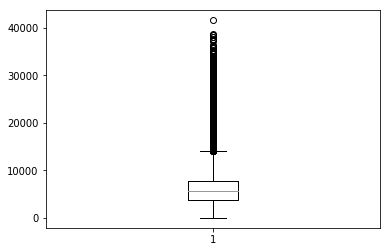

In [89]:
plt.boxplot(training_with_info.Sales);

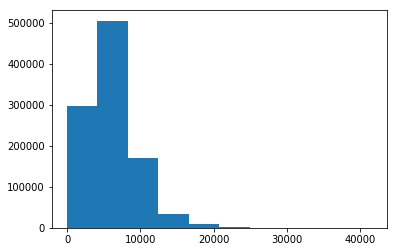

In [90]:
plt.hist(training_with_info.Sales);

In [91]:
training_with_info.Sales.describe()

count    1.017209e+06
mean     5.773819e+03
std      3.849926e+03
min      0.000000e+00
25%      3.727000e+03
50%      5.744000e+03
75%      7.856000e+03
max      4.155100e+04
Name: Sales, dtype: float64

In [92]:
testing_copy.Date.unique() #Find out the duration of testing set

array(['2015-09-17', '2015-09-16', '2015-09-15', '2015-09-14',
       '2015-09-13', '2015-09-12', '2015-09-11', '2015-09-10',
       '2015-09-09', '2015-09-08', '2015-09-07', '2015-09-06',
       '2015-09-05', '2015-09-04', '2015-09-03', '2015-09-02',
       '2015-09-01', '2015-08-31', '2015-08-30', '2015-08-29',
       '2015-08-28', '2015-08-27', '2015-08-26', '2015-08-25',
       '2015-08-24', '2015-08-23', '2015-08-22', '2015-08-21',
       '2015-08-20', '2015-08-19', '2015-08-18', '2015-08-17',
       '2015-08-16', '2015-08-15', '2015-08-14', '2015-08-13',
       '2015-08-12', '2015-08-11', '2015-08-10', '2015-08-09',
       '2015-08-08', '2015-08-07', '2015-08-06', '2015-08-05',
       '2015-08-04', '2015-08-03', '2015-08-02', '2015-08-01'], dtype=object)

In [93]:
training_with_info[(training_with_info.Month>7)&(training_with_info.Month <10)].describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Year,Month,Day
count,125050.000000,125050.000000,125050.000000,125050.000000,125050.000000,125050.000000,125050.000000,124745.000000,85217.000000,85217.000000,125050.000000,60146.000000,60146.000000,125050.000000,125050.000000,125050.000000
mean,559.160000,4.034226,5632.637609,638.533890,0.853603,0.368133,0.316162,5472.792176,7.219757,2008.726557,0.480976,22.679513,2011.733266,2013.456098,8.491803,15.754098
std,321.969613,2.019393,3550.172867,447.695366,0.353506,0.482300,0.464979,7808.556028,3.214554,5.637718,0.499640,14.015854,1.643382,0.498071,0.499935,8.806992
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000,2013.000000,8.000000,1.000000
25%,282.000000,2.000000,3771.000000,420.000000,1.000000,0.000000,0.000000,700.000000,4.000000,2006.000000,0.000000,13.000000,2011.000000,2013.000000,8.000000,8.000000
50%,558.500000,4.000000,5570.000000,609.000000,1.000000,0.000000,0.000000,2330.000000,8.000000,2010.000000,0.000000,18.000000,2012.000000,2013.000000,8.000000,16.000000
75%,839.000000,6.000000,7525.000000,828.000000,1.000000,1.000000,1.000000,6890.000000,10.000000,2013.000000,1.000000,37.000000,2013.000000,2014.000000,9.000000,23.000000
max,1115.000000,7.000000,33913.000000,5145.000000,1.000000,1.000000,1.000000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000,2014.000000,9.000000,31.000000


Month
8    AxesSubplot(0.125,0.125;0.775x0.755)
9    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Sales, dtype: object

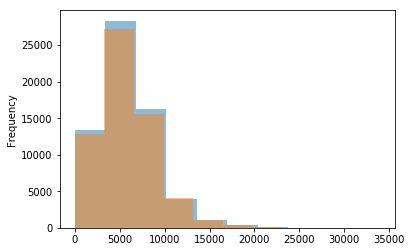

In [94]:
training_with_info[(training_with_info.Month>7)&(training_with_info.Month <10)].groupby(by='Month').Sales.plot.hist(alpha=0.5)

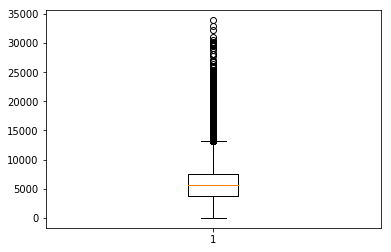

In [95]:
plt.boxplot(training_with_info[(training_with_info.Month>7)&(training_with_info.Month <10)].Sales);

Conclusion: Through checking **Date** feature of testing set, I find that the duration of testing set between 2015-8 and 2015-9. So I extract the corresponding data from training set and plot out their slae distribution. It truns out that 8 month and 9 month are overlap, and from the previous **Stateholiday** analysis, I find that there is almost no holiday in August and September, So I think it is probably have a relative steady fluctuation of **Sales**. 

In [96]:
sales_q3= 7525
sale_q1= 3771
inter_quartile_sale = sales_q3-sale_q1
upper_bound = sales_q3+1.5*inter_quartile_sale
info_8_9 = training_with_info[(training_with_info.Month>7)&(training_with_info.Month <10)]
info_8_9[info_8_9.Sales>upper_bound]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
322420,24,2,2014-09-30,16957,1258,1,1,0,0,a,...,4590.0,3.0,2000.0,1,40.0,2011.0,"Jan,Apr,Jul,Oct",2014,9,30
322421,25,2,2014-09-30,15395,1930,1,1,0,0,c,...,430.0,4.0,2003.0,0,NaN,NaN,NaN,2014,9,30
322423,27,2,2014-09-30,18037,1600,1,1,0,0,a,...,60.0,1.0,2005.0,1,5.0,2011.0,"Jan,Apr,Jul,Oct",2014,9,30
322430,35,2,2014-09-30,16933,1095,1,1,0,0,d,...,7660.0,10.0,2000.0,1,1.0,2012.0,"Jan,Apr,Jul,Oct",2014,9,30
322435,42,2,2014-09-30,16693,1543,1,1,0,0,a,...,290.0,NaN,NaN,1,40.0,2011.0,"Jan,Apr,Jul,Oct",2014,9,30
322453,64,2,2014-09-30,16244,1096,1,1,0,0,d,...,22560.0,NaN,NaN,1,14.0,2013.0,"Jan,Apr,Jul,Oct",2014,9,30
322468,82,2,2014-09-30,14070,1145,1,1,0,0,a,...,22390.0,4.0,2008.0,1,37.0,2009.0,"Jan,Apr,Jul,Oct",2014,9,30
322470,84,2,2014-09-30,17189,1663,1,1,0,0,a,...,11810.0,8.0,2014.0,0,NaN,NaN,NaN,2014,9,30
322505,125,2,2014-09-30,16132,1906,1,1,0,0,a,...,760.0,12.0,2005.0,0,NaN,NaN,NaN,2014,9,30
322534,167,2,2014-09-30,13790,1398,1,1,0,0,a,...,140.0,4.0,2008.0,0,NaN,NaN,NaN,2014,9,30


In [97]:
info_8_9

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
322400,1,2,2014-09-30,4919,550,1,1,0,0,c,...,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2014,9,30
322401,2,2,2014-09-30,8461,839,1,1,0,0,a,...,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2014,9,30
322402,3,2,2014-09-30,12260,1084,1,1,0,0,a,...,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2014,9,30
322403,4,2,2014-09-30,12659,1486,1,1,0,0,c,...,620.0,9.0,2009.0,0,NaN,NaN,NaN,2014,9,30
322404,5,2,2014-09-30,6633,676,1,1,0,0,a,...,29910.0,4.0,2015.0,0,NaN,NaN,NaN,2014,9,30
322405,6,2,2014-09-30,7320,786,1,1,0,0,a,...,310.0,12.0,2013.0,0,NaN,NaN,NaN,2014,9,30
322406,7,2,2014-09-30,12636,1177,1,1,0,0,a,...,24000.0,4.0,2013.0,0,NaN,NaN,NaN,2014,9,30
322407,8,2,2014-09-30,9061,915,1,1,0,0,a,...,7520.0,10.0,2014.0,0,NaN,NaN,NaN,2014,9,30
322408,9,2,2014-09-30,8663,730,1,1,0,0,a,...,2030.0,8.0,2000.0,0,NaN,NaN,NaN,2014,9,30
322409,10,2,2014-09-30,6790,697,1,1,0,0,a,...,3160.0,9.0,2009.0,0,NaN,NaN,NaN,2014,9,30


In [98]:
info_8_9[info_8_9.Sales>upper_bound].Date.value_counts()

2014-09-01    184
2013-08-12    169
2013-09-09    153
2014-08-18    136
2014-08-04    118
2013-08-26    116
2014-09-30    108
2014-09-15     98
2014-09-29     85
2013-09-23     67
2013-08-13     62
2014-08-19     62
2013-08-30     61
2014-09-02     58
2013-08-01     56
2013-09-10     51
2014-08-05     49
2013-08-14     43
2013-09-13     41
2013-08-27     41
2014-08-01     40
2013-09-11     39
2014-09-16     37
2014-08-20     36
2014-09-03     35
2013-09-12     35
2013-09-30     34
2013-08-29     34
2013-08-16     32
2013-09-24     32
             ... 
2013-08-24     11
2013-09-20     11
2014-09-23     11
2013-09-17     11
2014-08-13     10
2014-08-26     10
2013-08-20     10
2013-09-05     10
2014-09-26     10
2014-09-24      9
2013-09-18      9
2014-09-25      8
2013-08-04      6
2013-09-29      6
2014-08-31      6
2013-09-01      6
2013-08-18      5
2014-08-17      5
2014-08-24      5
2014-09-21      5
2014-08-03      5
2014-08-10      5
2014-09-14      5
2014-09-28      4
2014-09-07

In [99]:
info_8_9[info_8_9.Sales>upper_bound].Year.value_counts()

2014    1744
2013    1680
Name: Year, dtype: int64

Conculsion: We can see that almost each day has stores sale well and the difference of stores number between 2013 and 2014 is not very big; though 2014 has exrta 64 stores sold well once between August and September. So I guess maybe 2015 will perform even better.

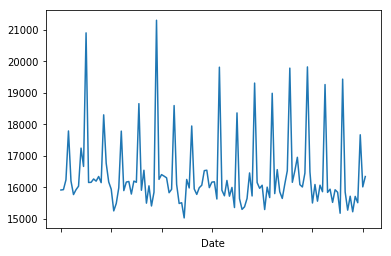

In [100]:
info_8_9[info_8_9.Sales>upper_bound].groupby(by='Date').Sales.mean().plot();

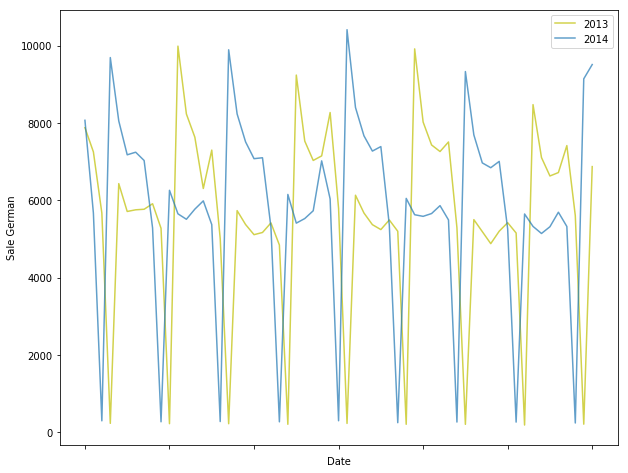

In [101]:
plt.figure(figsize=(10,8))
info_8_9[info_8_9.Year==2013].groupby(by='Date').Sales.mean().plot(color='y',label='2013',alpha= 0.7)
info_8_9[info_8_9.Year==2014].groupby(by='Date').Sales.mean().plot(label= '2014',alpha= 0.7)
plt.legend()
plt.ylabel('Sale German');

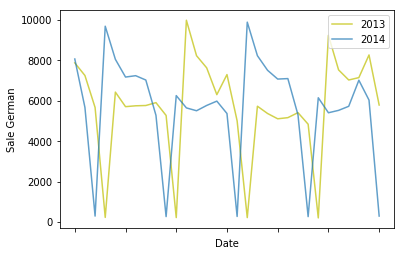

In [102]:
info_8_9[(info_8_9.Year==2013)&(info_8_9.Month==8)].groupby(by='Date').Sales.mean().plot(color='y',label='2013',alpha= 0.7)
info_8_9[(info_8_9.Year==2014)&(info_8_9.Month==8)].groupby(by='Date').Sales.mean().plot(label= '2014',alpha= 0.7)
plt.legend()
plt.ylabel('Sale German');

In [103]:
info_8_9[info_8_9.Year==2013].groupby(by=['Date','DayOfWeek']).Sales.mean()

Date        DayOfWeek
2013-08-01  4            7877.565022
2013-08-02  5            7251.682511
2013-08-03  6            5668.905830
2013-08-04  7             226.769507
2013-08-05  1            6430.397309
2013-08-06  2            5709.759641
2013-08-07  3            5752.894170
2013-08-08  4            5767.208072
2013-08-09  5            5909.685202
2013-08-10  6            5274.928251
2013-08-11  7             218.258296
2013-08-12  1            9988.518386
2013-08-13  2            8232.726457
2013-08-14  3            7631.843049
2013-08-15  4            6304.517489
2013-08-16  5            7298.140807
2013-08-17  6            5008.582960
2013-08-18  7             216.854709
2013-08-19  1            5731.932735
2013-08-20  2            5372.046637
2013-08-21  3            5109.356054
2013-08-22  4            5165.908520
2013-08-23  5            5413.395516
2013-08-24  6            4841.174888
2013-08-25  7             201.956951
2013-08-26  1            9239.840359
2013-08-27  2   

Conclusion: Fromn the line chart, We can see that both 2013 and 2014 sale performance have a continuous iteration of 'low-high-average'. Then I use groupby() function to see the **Sales** detail of each day and I find that after the sunday rest the sales performance runs to peak and then gradually falls down till reach to local lowest which is another dayoff. And also, the overall peroid follows 'high-low' circle, we can see that if pervious week has a better sale performance then the next week will become sluggish. So I believe the **DayOfWeek** feature will paly an important role in forecasting sale performance and also if I can calulate number of week with respect to **Date** might help me predict the sale perpofrmance.